In [ ]:
# mount google drive where the dataset csv files are stored in the folder credit_card_dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores
import gc 
gc.collect()
#multiprocessing.set_start_method('forkserver')

11

In [ ]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/credit_card_dataset/train.csv')

In [ ]:
#get basic stats
df_train.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


In [ ]:
# quick view of the data
df_train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [ ]:
df_train

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,Doris,55,F,N,N,2.0,96207.57,117.0,Unknown,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,CST_136670,Luciana,31,F,N,Y,0.0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,Jessica,27,F,N,Y,0.0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,Tessa,32,M,Y,N,0.0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


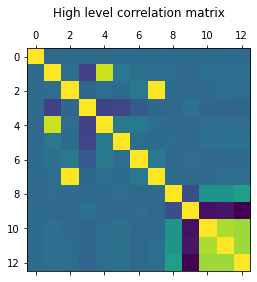

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
age,1.000000,-0.009082,0.004079,0.000506,-0.010640,-0.005519,-0.002453,0.004473,-0.005529,0.000817,0.001393,-0.001406,-0.000983
no_of_children,-0.009082,1.000000,0.008939,-0.243088,0.880278,0.070673,0.028706,0.009354,0.007487,-0.014673,0.019528,0.021620,0.023689
net_yearly_income,0.004079,0.008939,1.000000,-0.029367,0.010432,0.001478,0.076958,0.993378,0.002696,-0.009688,-0.004696,0.015092,0.011508
no_of_days_employed,0.000506,-0.243088,-0.029367,1.000000,-0.229344,-0.219521,-0.104545,-0.027745,-0.018720,0.035533,-0.036232,-0.034295,-0.047043
total_family_members,-0.010640,0.880278,0.010432,-0.229344,1.000000,0.080634,0.078669,0.010251,0.001928,-0.011524,0.010608,0.013411,0.010754
migrant_worker,-0.005519,0.070673,0.001478,-0.219521,0.080634,1.000000,0.014170,-0.000110,0.010198,-0.013319,0.029202,0.029964,0.034013
yearly_debt_payments,-0.002453,0.028706,0.076958,-0.104545,0.078669,0.014170,1.000000,0.075169,-0.006850,0.005756,-0.012738,-0.011619,-0.013089
credit_limit,0.004473,0.009354,0.993378,-0.027745,0.010251,-0.000110,0.075169,1.000000,0.003109,-0.009685,-0.004302,0.015759,0.012250
credit_limit_used(%),-0.005529,0.007487,0.002696,-0.018720,0.001928,0.010198,-0.006850,0.003109,1.000000,-0.174420,0.252505,0.253684,0.326641
credit_score,0.000817,-0.014673,-0.009688,0.035533,-0.011524,-0.013319,0.005756,-0.009685,-0.174420,1.000000,-0.471421,-0.450712,-0.543164


In [ ]:
# correlation matrix

import matplotlib.pyplot as plt
from IPython.display import display
def plot_correlation_matrices(df):
  plt.matshow(df.corr())
  plt.title('High level correlation matrix', pad=20)
  plt.show()
  corr = df.corr()
  #corr.style.set_caption('Detailed correlation matrix')
  corr_styler = corr.style.background_gradient(cmap='coolwarm')
  corr_styler_w_caption = corr_styler.set_caption('Detailed correlation matrix')
  display(corr_styler_w_caption)
  
plot_correlation_matrices(df_train)

In [ ]:
# are there nan values
print("does data contain any nan: ", any(df_train.isna()))

does data contain any nan:  True


In [ ]:
# remove nan containing rows
import numpy as np
def dropna_return(df):
  df = df.dropna()
  return df.reset_index(drop=True)

#do not drop nan. Ultimately decided not to drop entire rows for containing nan in just one column. Used data interpolation methods to fill nans later.

#df_train_sans_na = dropna_return(df_train_sans_na)
df_train_sans_na = df_train

In [ ]:
'''
df_train = df_train.interpolate(method='nearest', axis=1)
len(df_train), len(dropna_return(df_train))
'''

"\ndf_train = df_train.interpolate(method='nearest', axis=1)\nlen(df_train), len(dropna_return(df_train))\n"

In [ ]:
print(df_train_sans_na.columns)
print("# of unique customers vs total number rows:", len(df_train_sans_na.customer_id.unique()), len(df_train_sans_na))
print("Each row is unique")
# gender, owns_car, owns_house, occupation_type, 
df_train_sans_na.migrant_worker.unique()

Index(['customer_id', 'name', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')
# of unique customers vs total number rows: 45528 45528
Each row is unique


array([ 1.,  0., nan])

In [ ]:
def to_categorical_dataframe(df, col_name):
  '''
  convert col_name of dataframe "df" to numerical categorical values. if n unique categories then range is from 0 to n-1
  '''
  unique_values = set(df[col_name].unique())
  unique_values.discard(np.nan)
  print(unique_values)
  unique_values = list(unique_values)
  values_to_categories = dict([(i, idx) for idx, i in enumerate(unique_values)])
  values_to_categories[np.nan] = np.nan
  print(values_to_categories)
  return [values_to_categories[i] for i in list(df[col_name])]


def to_categorical_dataframe_balanced(df, col_name):
  '''
  Similar to "to_categorical_dataframe". if n unique categories thencategory range from -n/2 to +n/2
  '''
  unique_values = list(set(df[col_name].unique()).discard(np.nan))
  values_to_categories = dict([(i, idx) for idx, i in enumerate(unique_values)])
  return [values_to_categories[i] for i in list(df[col_name])]
  

df_train_sans_na = df_train_sans_na.assign(gender=to_categorical_dataframe(df_train_sans_na, 'gender'))
df_train_sans_na = df_train_sans_na.assign(owns_car=to_categorical_dataframe(df_train_sans_na, 'owns_car'))
df_train_sans_na = df_train_sans_na.assign(owns_house=to_categorical_dataframe(df_train_sans_na, 'owns_house'))
df_train_sans_na = df_train_sans_na.assign(occupation_type=to_categorical_dataframe(df_train_sans_na, 'occupation_type'))
df_train_sans_na = df_train_sans_na[df_train_sans_na.columns[2:]] # remove id and name columns

{'XNA', 'M', 'F'}
{'XNA': 0, 'M': 1, 'F': 2, nan: nan}
{'N', 'Y'}
{'N': 0, 'Y': 1, nan: nan}
{'N', 'Y'}
{'N': 0, 'Y': 1, nan: nan}
{'Private service staff', 'Waiters/barmen staff', 'Realty agents', 'IT staff', 'HR staff', 'Cleaning staff', 'High skill tech staff', 'Core staff', 'Drivers', 'Sales staff', 'Medicine staff', 'Unknown', 'Accountants', 'Security staff', 'Managers', 'Cooking staff', 'Low-skill Laborers', 'Secretaries', 'Laborers'}
{'Private service staff': 0, 'Waiters/barmen staff': 1, 'Realty agents': 2, 'IT staff': 3, 'HR staff': 4, 'Cleaning staff': 5, 'High skill tech staff': 6, 'Core staff': 7, 'Drivers': 8, 'Sales staff': 9, 'Medicine staff': 10, 'Unknown': 11, 'Accountants': 12, 'Security staff': 13, 'Managers': 14, 'Cooking staff': 15, 'Low-skill Laborers': 16, 'Secretaries': 17, 'Laborers': 18, nan: nan}


In [ ]:
df_train_sans_na.columns
def df_transform(df):
  '''
  drop certain columns 
  '''

  #df['owns_car'] = df.owns_car + df.owns_house # drop owns_house
  df['credit_amount_used'] = df['credit_limit']*df['credit_limit_used(%)'] # drop 'credit_limit_used(%)'
  # drop default_in_last_6months (number of defaults is enough)
  # drop no_of_children (no_of_family_members is enough)
  #df.drop('owns_house', axis='columns', inplace=True)
  #df.drop('credit_limit_used(%)', axis='columns', inplace=True)
  #df.drop('default_in_last_6months', axis='columns', inplace=True)
  if 'no_of_children' in df.columns:
    df.drop('no_of_children', axis='columns', inplace=True)
  df_columns = set(df.columns)
  if 'credit_card_default' in df_columns:
    df_columns.discard('credit_card_default')
    return df[list(df_columns)+['credit_card_default']]
  else:
    return df[list(df_columns)]

#df_train_sans_na = df_transform(df_train_sans_na)

In [ ]:
df_train_sans_na.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,2,0.0,1,0.0,107934.04,612.0,11,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,1,0.0,1,0.0,109862.62,2771.0,18,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,1,0.0,1,0.0,230153.17,204.0,18,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,2,0.0,1,0.0,122325.82,11941.0,7,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,1,1.0,1,0.0,387286.00,1459.0,7,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


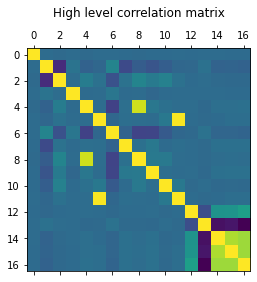

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
age,1.000000,0.004188,-0.006999,0.002367,-0.009082,0.004079,0.000506,-0.005547,-0.010640,-0.005519,-0.002453,0.004473,-0.005529,0.000817,0.001393,-0.001406,-0.000983
gender,0.004188,1.000000,-0.346328,0.041786,-0.055832,-0.028116,0.154554,-0.198496,-0.088707,-0.134865,-0.081618,-0.026998,-0.019424,0.032671,-0.049795,-0.045858,-0.057544
owns_car,-0.006999,-0.346328,1.000000,0.005455,0.104520,0.031857,-0.152191,0.036939,0.150534,0.094141,0.135171,0.030506,-0.002444,0.008180,-0.011622,-0.016363,-0.017171
owns_house,0.002367,0.041786,0.005455,1.000000,-0.004773,0.003015,0.061901,-0.001182,0.003759,-0.025199,-0.003845,0.003172,0.001453,0.002121,0.003068,-0.002221,-0.002693
no_of_children,-0.009082,-0.055832,0.104520,-0.004773,1.000000,0.008939,-0.243088,0.020261,0.880278,0.070673,0.028706,0.009354,0.007487,-0.014673,0.019528,0.021620,0.023689
net_yearly_income,0.004079,-0.028116,0.031857,0.003015,0.008939,1.000000,-0.029367,0.011685,0.010432,0.001478,0.076958,0.993378,0.002696,-0.009688,-0.004696,0.015092,0.011508
no_of_days_employed,0.000506,0.154554,-0.152191,0.061901,-0.243088,-0.029367,1.000000,-0.052795,-0.229344,-0.219521,-0.104545,-0.027745,-0.018720,0.035533,-0.036232,-0.034295,-0.047043
occupation_type,-0.005547,-0.198496,0.036939,-0.001182,0.020261,0.011685,-0.052795,1.000000,0.024532,0.073418,-0.001745,0.011531,0.001600,-0.011691,0.024097,0.023486,0.027666
total_family_members,-0.010640,-0.088707,0.150534,0.003759,0.880278,0.010432,-0.229344,0.024532,1.000000,0.080634,0.078669,0.010251,0.001928,-0.011524,0.010608,0.013411,0.010754
migrant_worker,-0.005519,-0.134865,0.094141,-0.025199,0.070673,0.001478,-0.219521,0.073418,0.080634,1.000000,0.014170,-0.000110,0.010198,-0.013319,0.029202,0.029964,0.034013


In [ ]:
# see if gender, no of kids, owns_houses, etc. correlate with prediction label
plot_correlation_matrices(df_train_sans_na)

In [ ]:
df_train_sans_na.credit_card_default.unique()

array([1, 0])

In [ ]:
x_train = [] 
y_train = [] 
interpolate_fit = None
normalize_fit = None

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler,SMOTE, SMOTEN, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import mutual_info_classif

def fillna_interpolate(x, strategy='simple', n_neighbors=5):
  if strategy=='simple':
    return SimpleImputer(strategy='most_frequent').fit(x)
  elif strategy=='knn':
    return KNNImputer(n_neighbors=n_neighbors).fit(x)

def get_data(x_train, y_train, df, mode='all', cols=['prev_defaults', 'default_in_last_6months'], train=True):
  if mode=='all':
    if train==True:
      x_train = np.array(df[df.columns[:-1]], dtype=np.float32)
    else:
      x_train = np.array(df[df.columns[:]], dtype=np.float32)
  elif mode=='corr':
    x_train = np.array(df[['credit_limit_used(%)', 'credit_score', 'prev_defaults', 'default_in_last_6months', 'yearly_debt_payments']], dtype=np.float32)
  elif mode=='specify':
    x_train = np.array(df[cols], dtype=np.float32)
  if train:
    y_train = np.array(df[['credit_card_default']], dtype=np.float32)
    return (x_train, y_train)
  return x_train

def get_normalize_fit(normalize='l2'):
  normalize_fit = None
  if normalize=='minmax':
    normalize_fit = MinMaxScaler().fit(x_train)
  elif normalize=='maxabs':
    normalize_fit = MaxAbsScaler().fit(x_train)
  elif normalize=='l2':
    normalize_fit = Normalizer(norm='l2').fit(x_train)
  elif normalize=='l1':
    normalize_fit = Normalizer(norm='l1').fit(x_train)
  elif normalize=='stand':
    normalize_fit = StandardScaler().fit(x_train)
  elif normalize=='robust':
    normalize_fit = RobustScaler().fit(x_train)

  #x_train = normalize_fit.transform(x_train)
  return normalize_fit

def get_pca_fit(x, n_components=4):
  pca = PCA(n_components=n_components)
  return pca.fit(x)

def random_oversampling(x, y, sampling_strategy='auto'):
  return RandomOverSampler(random_state=343, sampling_strategy=sampling_strategy).fit_resample(x, y.reshape(-1, 1))

def smote_sampling(x, y, sampling_strategy='auto'):
  return SMOTEENN(random_state=343, sampling_strategy=sampling_strategy).fit_resample(x, y.reshape(-1, 1))

def adasyn_sampling(x, y, sampling_strategy='auto'):
  return ADASYN(random_state=343, sampling_strategy=sampling_strategy).fit_resample(x, y.reshape(-1, 1))

In [ ]:
import gc
gc.collect()

col_mode = 'all'
interpolate_strategy = 'knn'
normalize_strategy = 'robust'
pca_n_components = 6
sampling_strategy = 0.15
cols = list(df_train_sans_na.columns)[:-1]
cols.remove('age')
pca_fit = None
#cols.remove('owns_house')
#cols.remove('no_of_children')
#cols.remove('yearly_debt_payments')

def preprocess_data(x_train, y_train, df):
  #df_train_sans_na = fillna_interpolate(df_train_sans_na)
  #cols = ['credit_limit_used(%)', 'credit_score', 'prev_defaults', 'default_in_last_6months']


  interpolate_fit = fillna_interpolate(x_train, strategy=interpolate_strategy, n_neighbors=5)
  x_train = interpolate_fit.transform(x_train)
  
  #x_train_seption, y_train_seption, x_partial, y_partial 
  minorityseption_bool_1, minorityseption_bool_0, bool_0 = remove_minorityseption(x_train, y_train, df)

  normalize_fit = get_normalize_fit(normalize=normalize_strategy)
  x_train = normalize_fit.transform(x_train)
  #pca_fit = get_pca_fit(x_train, n_components=pca_n_components)
  #x_train = pca_fit.transform(x_train)
  #(x_train, y_train) = random_oversampling(x_train, y_train, sampling_strategy=0.3)
  #(x_train, y_train) = RandomUnderSampler(sampling_strategy=0.25, random_state=343).fit_resample(x_train, y_train)
  return (x_train, y_train, interpolate_fit, normalize_fit, minorityseption_bool_1, minorityseption_bool_0, bool_0)

def remove_minorityseption(x, y, df):
  df_columns = list(df.columns)[:-1]
  print(df_columns)
  defs_6mos = df_columns.index('default_in_last_6months')
  prev_defs = df_columns.index('prev_defaults')
  print(defs_6mos, prev_defs)
  #prev_defs = 2
  #defs_6mos = 3
  minorityseption_bool_1 = np.logical_and(np.logical_or(x_train[:, defs_6mos]!=0, x_train[:, prev_defs]!=0), (y_train==1).reshape(-1))
  minorityseption_bool_0 = np.logical_and(np.logical_or(x_train[:, defs_6mos]==0, x_train[:, prev_defs]==0), (y_train==1).reshape(-1))
  bool_0 = (y_train==0).reshape(-1)
  print(minorityseption_bool_1.shape)
  return minorityseption_bool_1, minorityseption_bool_0, bool_0

(x_train, y_train) = get_data(x_train, y_train, df_train_sans_na, mode=col_mode, cols=cols)

(x_train, y_train, interpolate_fit, normalize_fit, minorityseption_bool_1, minorityseption_bool_0, bool_0) = preprocess_data(x_train
                                                                                                                           , y_train
                                                                                                                           , df_train_sans_na)

#x_train_seption, y_train_seption, x_partial, y_partial = remove_minorityseption(x_train, y_train, df_train_sans_na)
x_train_seption = x_train[bool_0]
y_train_seption = y_train[bool_0]
x_train_seption = np.vstack((x_train_seption, x_train[minorityseption_bool_0]))
y_train_seption = np.hstack((y_train_seption.reshape(-1), y_train[minorityseption_bool_0].reshape(-1)))

(x_train_smote, y_train_smote) = random_oversampling(x_train_seption, y_train_seption, sampling_strategy=sampling_strategy)
x_train_smote = np.vstack((x_train_smote, x_train[minorityseption_bool_1]))
y_train_smote = np.hstack((y_train_smote, y_train[minorityseption_bool_1].reshape(-1)))
np.random.shuffle(x_train_smote)
np.random.shuffle(y_train_smote)

(x_train_adasyn, y_train_adasyn) = adasyn_sampling(x_train_seption, y_train_seption, sampling_strategy=sampling_strategy)
x_train_adasyn = np.vstack((x_train_smote, x_train[minorityseption_bool_1]))
y_train_adasyn = np.hstack((y_train_smote, y_train[minorityseption_bool_1].reshape(-1)))
np.random.shuffle(x_train_adasyn)
np.random.shuffle(x_train_adasyn)

x_train.shape, y_train.shape


['age', 'gender', 'owns_car', 'owns_house', 'no_of_children', 'net_yearly_income', 'no_of_days_employed', 'occupation_type', 'total_family_members', 'migrant_worker', 'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults', 'default_in_last_6months']
15 14
(45528,)


((45528, 16), (45528, 1))

In [ ]:
'''
print(df_train_sans_na[np.logical_not(minorityseption_bool)].prev_defaults.unique())
print(df_train_sans_na[np.logical_not(minorityseption_bool)].default_in_last_6months.unique())
'''

NameError: ignored

In [ ]:
df_train_sans_na.describe()

In [ ]:
sum(minorityseption_bool)/len(minorityseption_bool)

In [ ]:
#y_train_smote = np.hstack((y_train_smote, y_partial.reshape(-1)))

In [ ]:
'''
#del df_columns
#del defs_6mos
#del prev_defs
#del minorityseption_bool
import gc
gc.collect()
x_train[np.equal(x_train[:, -1],1)]
np.logical_and(np.logical_or(x_train[:, -1]!=0, x_train[:, -2]!=0), (y_train==1).reshape(-1))
'''

In [ ]:
'''
x_train[np.logical_and(x_train[:, -2]==0,
               x_train[:, -2])]
'''

In [ ]:
'''
df_train_sans_na.columns
'''

In [ ]:
'''
cols = cols
mutual_info = mutual_info_classif(x_train, y_train.reshape(-1), random_state=343
                                  , discrete_features=[True, True, False, False, True, False, True, False, False, False, False])
print(len(mutual_info), len(cols))
for i, j in zip(cols, mutual_info):
  print(str(i)+' : '+str(j))
'''

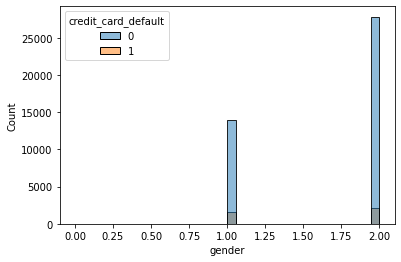

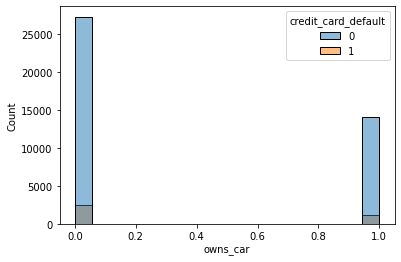

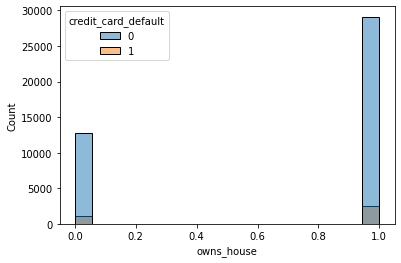

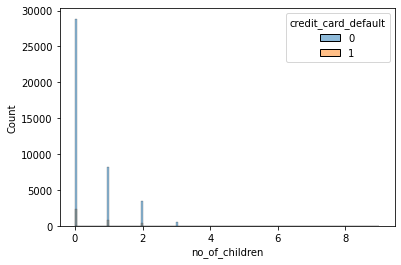

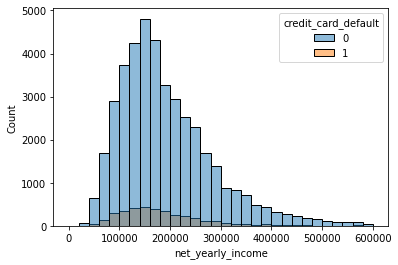

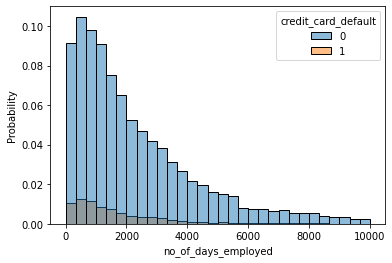

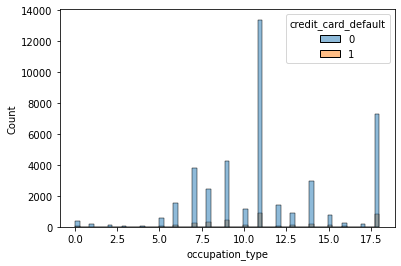

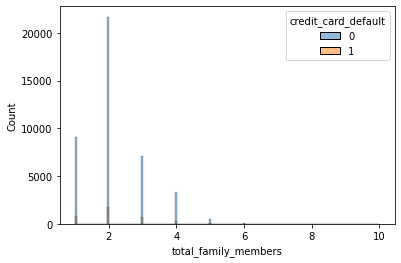

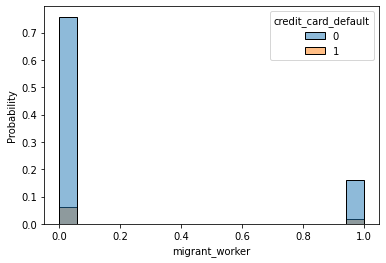

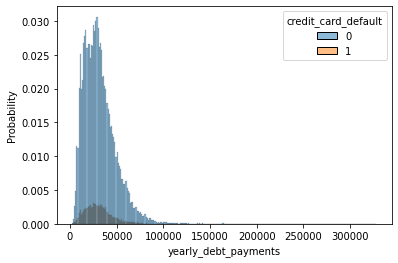

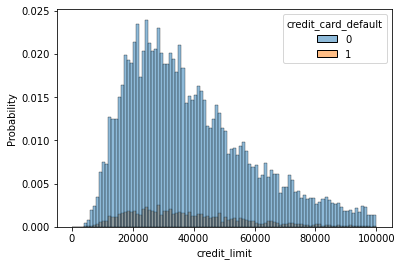

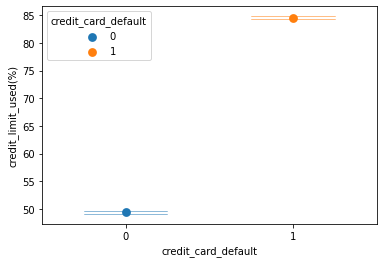

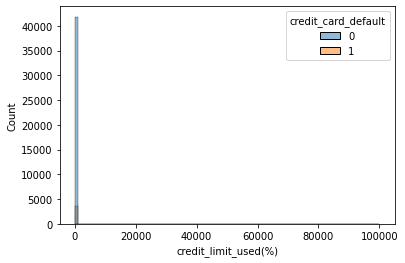

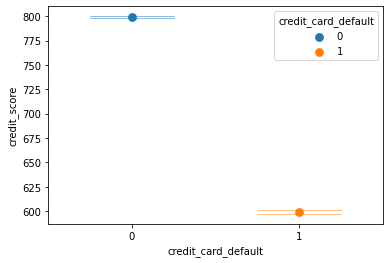

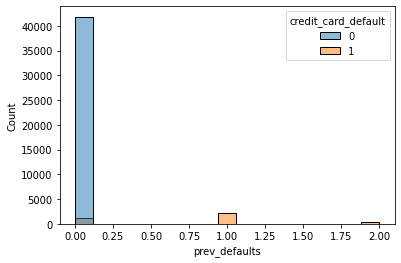

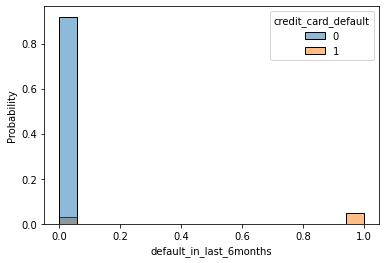

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#for x in df_train_sans_na.columns[:-1]:
#  plt.figure()
#  sns.histplot(x=x, data=df_train_sans_na, stat='count', hue='credit_card_default')

if 'age' in cols:
  plt.figure()
  sns.histplot(x='age', data=df_train_sans_na, stat='count', hue='credit_card_default')
if 'gender' in cols:
  plt.figure()
  sns.histplot(x='gender', data=df_train_sans_na, stat='count', hue='credit_card_default')
if 'owns_car' in cols:
  plt.figure()
  sns.histplot(x='owns_car', data=df_train_sans_na, stat='count', hue='credit_card_default')
if 'owns_house' in cols:
  plt.figure()
  sns.histplot(x='owns_house', data=df_train_sans_na, stat='count', hue='credit_card_default')
if 'no_of_children' in cols:
  plt.figure()
  sns.histplot(x='no_of_children', data=df_train_sans_na, stat='count', hue='credit_card_default')
if 'net_yearly_income' in cols:  
  plt.figure()
  sns.histplot(x='net_yearly_income', data=df_train_sans_na, stat='count', bins=30, binrange=(0, 600000), hue='credit_card_default')
if 'no_of_days_employed' in cols:  
  plt.figure()
  sns.histplot(x='no_of_days_employed', data=df_train_sans_na, stat='probability', bins=30, binrange=(0, 10000), hue='credit_card_default')
if 'occupation_type' in cols:  
  plt.figure()
  sns.histplot(x='occupation_type', data=df_train_sans_na, stat='count', hue='credit_card_default')
if 'total_family_members' in cols:  
  plt.figure()
  sns.histplot(x='total_family_members', data=df_train_sans_na, stat='count', hue='credit_card_default')
if 'migrant_worker' in cols:  
  plt.figure()
  sns.histplot(x='migrant_worker', data=df_train_sans_na, stat='probability', hue='credit_card_default')
if 'yearly_debt_payments' in cols:  
  plt.figure()
  sns.histplot(x='yearly_debt_payments', data=df_train_sans_na, stat='probability', hue='credit_card_default')
if 'credit_limit' in cols:  
  plt.figure()
  sns.histplot(x='credit_limit', data=df_train_sans_na, stat='probability', bins=100, binrange=(0, 100000), hue='credit_card_default')
if 'credit_limit_used(%)' in cols:  
  plt.figure()
  sns.pointplot(x='credit_card_default', y='credit_limit_used(%)', errwidth=0.5, capsize=0.5, data=df_train_sans_na, hue='credit_card_default')
  plt.figure()
  sns.histplot(x='credit_limit_used(%)', data=df_train_sans_na, stat='count', bins=100, binrange=(0, 100000), hue='credit_card_default')
if 'credit_score' in cols:  
  plt.figure()
  sns.pointplot(x='credit_card_default', y='credit_score', errwidth=0.5, capsize=0.5, data=df_train_sans_na, hue='credit_card_default')
#plt.errorbar(x=df_train_sans_na.credit_card_default, y=df_train_sans_na['credit_limit_used(%)'])
if 'prev_defaults' in cols:  
  plt.figure()
  #sns.pointplot(x='credit_card_default', y='prev_defaults', errwidth=0.5, capsize=0.5, data=df_train_sans_na, hue='credit_card_default')
  sns.histplot(x='prev_defaults', data=df_train_sans_na, stat='count', hue='credit_card_default')
if 'default_in_last_6months' in cols:  
  plt.figure()
  sns.histplot(x='default_in_last_6months', data=df_train_sans_na, stat='probability', hue='credit_card_default')


In [ ]:
'''
plt.figure()
sns.histplot(x=df_train_sans_na['credit_limit']*df_train_sans_na['credit_limit_used(%)']
             , data=df_train_sans_na, stat='count', hue='credit_card_default', bins=10, binrange=(0, 100000))
'''

In [ ]:
#df_train_sans_na.net_yearly_income

In [ ]:
df_test = pd.read_csv('/content/test.csv')
x_test = []
y_test = []

'''
{'XNA', 'M', 'F'}
{'XNA': 0, 'M': 1, 'F': 2, nan: nan}
{'N', 'Y'}
{'N': 0, 'Y': 1, nan: nan}
{'N', 'Y'}
{'N': 0, 'Y': 1, nan: nan}
{'Private service staff', 'Waiters/barmen staff', 'Realty agents', 'IT staff', 'HR staff', 'Cleaning staff', 'High skill tech staff', 'Core staff', 'Drivers', 'Sales staff', 'Medicine staff', 'Unknown', 'Accountants', 'Security staff', 'Managers', 'Cooking staff', 'Low-skill Laborers', 'Secretaries', 'Laborers'}
{'Private service staff': 0, 'Waiters/barmen staff': 1, 'Realty agents': 2, 'IT staff': 3, 'HR staff': 4, 'Cleaning staff': 5, 'High skill tech staff': 6, 'Core staff': 7, 'Drivers': 8, 'Sales staff': 9, 'Medicine staff': 10, 'Unknown': 11, 'Accountants': 12, 'Security staff': 13, 'Managers': 14, 'Cooking staff': 15, 'Low-skill Laborers': 16, 'Secretaries': 17, 'Laborers': 18, nan: nan}

'''

def to_categorical_dataframe_(df, col_name, values_to_categories, label=False):
  '''
  category range from 0 to +n
  '''
  values_to_categories[np.nan] = np.nan
  print(values_to_categories)
  if label:
    index_to_labels = values_to_categories
  return [values_to_categories[i] for i in list(df[col_name])]

def transform_test_data(x_test, y_test, df_test, interpolate_fit):
  df_test = df_test.assign(gender=to_categorical_dataframe_(df_test, 'gender', {'XNA': 0, 'M': 1, 'F': 2}))
  df_test = df_test.assign(owns_car=to_categorical_dataframe_(df_test, 'owns_car', {'N': 0, 'Y': 1}))
  df_test = df_test.assign(owns_house=to_categorical_dataframe_(df_test, 'owns_house', {'N': 0, 'Y': 1}))
  df_test = df_test.assign(occupation_type=to_categorical_dataframe_(df_test, 'occupation_type', {'Private service staff': 0, 'Waiters/barmen staff': 1, 'Realty agents': 2, 'IT staff': 3, 'HR staff': 4, 'Cleaning staff': 5, 'High skill tech staff': 6, 'Core staff': 7, 'Drivers': 8, 'Sales staff': 9, 'Medicine staff': 10, 'Unknown': 11, 'Accountants': 12, 'Security staff': 13, 'Managers': 14, 'Cooking staff': 15, 'Low-skill Laborers': 16, 'Secretaries': 17, 'Laborers': 18}))
  df_test = df_test[df_test.columns[2:]] # remove id and name columns
  #df_test = df_transform(df_test)
  x_test = get_data(x_test, y_test, df_test, mode=col_mode, cols=cols, train=False)
  x_test = interpolate_fit.transform(x_test)
  x_test = normalize_fit.transform(x_test)
  #x_test = pca_fit.transform(x_test)
  return (x_test, df_test)

x_test, df_test = transform_test_data(x_test, y_test, df_test, interpolate_fit)


{'XNA': 0, 'M': 1, 'F': 2, nan: nan}
{'N': 0, 'Y': 1, nan: nan}
{'N': 0, 'Y': 1, nan: nan}
{'Private service staff': 0, 'Waiters/barmen staff': 1, 'Realty agents': 2, 'IT staff': 3, 'HR staff': 4, 'Cleaning staff': 5, 'High skill tech staff': 6, 'Core staff': 7, 'Drivers': 8, 'Sales staff': 9, 'Medicine staff': 10, 'Unknown': 11, 'Accountants': 12, 'Security staff': 13, 'Managers': 14, 'Cooking staff': 15, 'Low-skill Laborers': 16, 'Secretaries': 17, 'Laborers': 18, nan: nan}


In [ ]:
#df_test.columns

In [ ]:
def write_test_res(final_label_predictions, filename='test_results.csv'):
  df_test = pd.read_csv('/content/test.csv')
  final_label_predictions = list(final_label_predictions.reshape(-1))
  df_test_predictions = pd.DataFrame({'customer_id': df_test.customer_id, 'credit_card_default': final_label_predictions})
  df_test_predictions.to_csv(filename, index=False)


In [ ]:
'''
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from pickle import dump, load
#from sklearn.externals.joblib import parallel_backend
from joblib import parallel_backend

#sys.modules['sklearn.externals.joblib'] = joblib


def xgb_f1_macro(predt: np.ndarray, dtrain: xgb.DMatrix) -> [str, float]:
    y = dtrain.get_label()
    return 'f1_macro', f1_score(y, (predt>0.5)*1, average='macro')

def f1_macro(clf, y_true, y_pred):
    return f1_score(y_true, (y_pred>0.5)*1, average='macro')

fone_scorer = make_scorer(f1_score, average='macro')

data_matrix = xgb.DMatrix(x_train, label=y_train)
params={'max_depth':[4, 6, 8, 10]
        , 'learning_rate':[0.003, 0.005, 0.007, 0.08, 0.01]
        , 'min_child_weight':[0.375]
        , 'subsample':[0.5, 0.75, 1.0]
        , 'colsample_bytree':[0.4, 0.6, 0.8, 1.0]
        , 'disable_default_eval_metric':['1']}
#, 'booster':['gbtree', 'dart', 'gblinear']
#'objective':['binary:logistic', 'binary:logitraw', 'binary:hinge', 'count:poisson']
#, 'n_estimators':[200, 400, 600, 800, 1000]
#params['interaction_constraints'] = '[[1, 2], [0, 3]]'
#xgb_clf = xgb.train(params=params, dtrain=data_matrix, num_boost_round=500, feval=f1_macro)
xgb_model = xgb.XGBClassifier(n_estimators=600)
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring=fone_scorer, cv=5, verbose=3, n_jobs=2)
#xgb_grid_search = xgb_grid_search.fit(x_train, y_train.reshape(-1))
with parallel_backend('threading'):
    xgb_grid_search.fit(x_train, y_train.reshape(-1))

#xgb_clf = xgb.train(params=params, dtrain=data_matrix, feval=f1_macro, maximize=True, xgb_model=xgb_model)
#xgb_clf = xgb_model.fit(x_train, y_train.reshape(-1))
#xgb_clf.predict(x_test)
#xgb_clf.predict(xgb.DMatrix(x_test))
dump(xgb_grid_search, open('/content/drive/MyDrive/credit_card_dataset/xgb_grid_search.p', 'wb'))
'''

In [ ]:
'''
sum(((xgb_clf.predict(xgb.DMatrix(x_test))>=0.9)*1)==0)/len(x_test)
'''

In [ ]:
'''
write_test_res((xgb_clf.predict(xgb.DMatrix(x_test))>=0.5)*1, 'xgb_test_results.csv')
'''

In [ ]:
from sklearn.model_selection import train_test_split
def get_validation_data(x, y):
  return train_test_split(x, y, test_size=0.15, random_state=343, stratify=y)

x_train, x_val, y_train, y_val = get_validation_data(x_train, y_train)
x_train_adasyn, x_val_adasyn, y_train_adasyn, y_val_adasyn = get_validation_data(x_train_adasyn, y_train_adasyn)
x_train_smote, x_val_smote, y_train_smote, y_val_smote = get_validation_data(x_train_smote, y_train_smote)

In [ ]:
'''
# train svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score

def train_svm(x, y, x_val, y_val):
  clf = SVC(gamma='auto', C=1.0, random_state=32, kernel='rbf')
  clf.fit(x, y.reshape((-1)))
  clf.score(x, y.reshape((-1)))
  print(100*f1_score(y_val.reshape((-1)), clf.predict(x_val), average='macro'))
  return clf

clf = train_svm(x_train_smote, y_train_smote, x_val_smote, y_val_smote)
# test svm
svm_final_label_predictions = clf.predict(x_test)
write_test_res(svm_final_label_predictions, 'svm_test_results.csv')
'''

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
def train_forest(x, y, x_val, y_val):
  clf_forest = RandomForestClassifier(max_depth=4, random_state=343, n_estimators=200)
  clf_forest.fit(x, y.reshape((-1)))
  print(100*f1_score(y_val.reshape((-1)), clf_forest.predict(x_val), average='macro'))
  return clf_forest


clf_forest = train_forest(x_train_smote, y_train_smote, x_val_smote, y_val_smote)

forest_final_label_predictions = clf_forest.predict(x_test)
write_test_res(forest_final_label_predictions, 'forest_test_results.csv')

45.195908959953904


In [ ]:
sum(y_train_smote==1)/len(y_train_smote)

0.1739258967284194

In [ ]:
from pickle import dump, load
'''
x_train = load(open('/content/drive/MyDrive/credit_card_dataset/x_train.p', 'rb'))
y_train = load(open('/content/drive/MyDrive/credit_card_dataset/y_train.p', 'rb'))
x_val = load(open('/content/drive/MyDrive/credit_card_dataset/x_val.p', 'rb'))
y_val = load(open('/content/drive/MyDrive/credit_card_dataset/y_val.p', 'rb'))
'''

"\nx_train = load(open('/content/drive/MyDrive/credit_card_dataset/x_train.p', 'rb'))\ny_train = load(open('/content/drive/MyDrive/credit_card_dataset/y_train.p', 'rb'))\nx_val = load(open('/content/drive/MyDrive/credit_card_dataset/x_val.p', 'rb'))\ny_val = load(open('/content/drive/MyDrive/credit_card_dataset/y_val.p', 'rb'))\n"

In [ ]:
input_shape = (x_train.shape[1], )
BATCH_SIZE = 32
epochs = 20

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, InputLayer
print(tf.__version__)
tf.random.set_seed(343)

# 200->0.6->200->0.7->200->1(sigmoid) 92.10930 -> 0.0002
# 300->0.7->300->0.8->300->1(sigmoid) 92.20151 -> 0.0002
def get_smote_model():
  model = tf.keras.models.Sequential()
  model.add(Dense(400, input_shape=input_shape, activation='elu'))
  model.add(Dense(400, activation='elu', activity_regularizer=tf.keras.regularizers.l2(0.008)))
  model.add(Dropout(0.5))
  model.add(Dense(400, activation='elu', activity_regularizer=tf.keras.regularizers.l2(0.008)))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  return model

def get_model():
  model = tf.keras.models.Sequential()
  model.add(Dense(300, input_shape=input_shape, activation='relu'))
  model.add(Dropout(0.7))
  model.add(Dense(300, activation='relu'))
  model.add(Dropout(0.7))
  model.add(Dense(300, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

2.7.0


In [ ]:
from sklearn.metrics import f1_score
tf.config.run_functions_eagerly(False)
from sklearn.model_selection import train_test_split
#tf.data.experimental.enable_debug_mode()
#@tf.function

#, global_clipnorm=3.0

class CustomCallback(tf.keras.callbacks.Callback):
  def __init__(self, x, y, x_val, y_val):
    self.x = x
    self.y = y
    self.x_val = x_val
    self.y_val = y_val
  def on_train_end(self, logs=None):
    print(self.my_metric_fn(self.y, self.model.predict(self.x)))
  def my_metric_fn(self, y_true, y_pred):
    return f1_score(y_true, (y_pred>0.5)*1, average='macro')
  def on_epoch_end(self, epoch, logs=None):
    print("Val F1-macro: ", self.my_metric_fn(self.y_val, self.model.predict(self.x_val)))


def train_model(model, x, y, x_val, y_val):
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), loss='binary_crossentropy', metrics=['acc'])
  model.fit(x=x, y=y, batch_size=BATCH_SIZE, shuffle=True, verbose=2, epochs=epochs, callbacks=[CustomCallback(x, y, x_val, y_val)]
            ,validation_data=(x_val, y_val))




In [ ]:
model = get_model()
train_model(model, x_train, y_train, x_val, y_val)



Epoch 1/20
Val F1-macro:  0.8848437157523863
1210/1210 - 8s - loss: 0.3161 - acc: 0.9287 - val_loss: 0.1044 - val_acc: 0.9706 - 8s/epoch - 7ms/step
Epoch 2/20
Val F1-macro:  0.8864012125459777
1210/1210 - 6s - loss: 0.1626 - acc: 0.9618 - val_loss: 0.0884 - val_acc: 0.9704 - 6s/epoch - 5ms/step
Epoch 3/20
Val F1-macro:  0.8880003312766573
1210/1210 - 6s - loss: 0.1226 - acc: 0.9661 - val_loss: 0.0919 - val_acc: 0.9710 - 6s/epoch - 5ms/step
Epoch 4/20
Val F1-macro:  0.8914676167536465
1210/1210 - 6s - loss: 0.0977 - acc: 0.9699 - val_loss: 0.0706 - val_acc: 0.9722 - 6s/epoch - 5ms/step
Epoch 5/20
Val F1-macro:  0.9002837926509186
1210/1210 - 5s - loss: 0.0871 - acc: 0.9737 - val_loss: 0.0619 - val_acc: 0.9739 - 5s/epoch - 4ms/step
Epoch 6/20
Val F1-macro:  0.9156528827383448
1210/1210 - 5s - loss: 0.0855 - acc: 0.9744 - val_loss: 0.0607 - val_acc: 0.9779 - 5s/epoch - 5ms/step
Epoch 7/20
Val F1-macro:  0.9166121908573622
1210/1210 - 5s - loss: 0.0830 - acc: 0.9775 - val_loss: 0.0572 - va

In [ ]:
# neural network
nn_final_label_predictions = (model.predict(x_test)>0.5)*1
write_test_res(nn_final_label_predictions, 'nn_test_results.csv')

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_val, (model.predict(x_val)>0.5)*1, xticks_rotation='vertical', normalize=None)

In [ ]:
df_train_sans_na.columns

In [ ]:

x_val_concat = np.hstack((normalize_fit.inverse_transform(x_val), y_val.reshape((-1, 1)), ((model.predict(x_val)>0.5)*1).reshape((-1, 1))))
df_val_pred = pd.DataFrame(np.hstack((x_val_concat, (x_val_concat[:,-1]==x_val_concat[:,-2]).reshape((-1, 1))))
                          , columns=list(df_train_sans_na.columns[:-1])+['y_true', 'y_pred', 'comp'])
df_val_pred.to_csv('x_val_concat.csv', index=False)

In [ ]:
df_val_pred_correct = df_val_pred[df_val_pred['comp']==1.0]
df_val_pred_incorrect = df_val_pred[df_val_pred['comp']==0.0]
x = df_val_pred_incorrect.prev_defaults.iloc[0]
print("incorrect: ", df_val_pred_incorrect.y_true.unique())
print("correct: ", df_val_pred_correct.y_true.unique())
print("Incorrect 6mos, prev_defaults: ", df_val_pred_incorrect.default_in_last_6months.unique(), df_val_pred_incorrect.prev_defaults.unique())
print("Correct 6mos, prev_defaults: ", df_val_pred_correct.default_in_last_6months.unique(), df_val_pred_correct.prev_defaults.unique())

In [ ]:
print(df_val_pred_incorrect.columns)
inco_6mos = df_val_pred_incorrect.default_in_last_6months.unique()[0]
co_prev_defaults = df_val_pred_incorrect.prev_defaults.unique()[0]
df_val_pred_correct.loc[((df_val_pred_correct['default_in_last_6months']==inco_6mos)
                         & (df_val_pred_correct['prev_defaults']==co_prev_defaults)
                         & (df_val_pred_correct['y_true']==0))].describe()
#print(len(df_val_pred_incorrect))

In [ ]:
print("correct, 0, 0, 1: ", len(df_val_pred_correct.loc[((df_val_pred_correct['default_in_last_6months']==inco_6mos)
                         & (df_val_pred_correct['prev_defaults']==co_prev_defaults)
                         & (df_val_pred_correct['y_true']==1))]))
print("correct, 0/1, 0/1, 1, all: ", len(df_val_pred_correct.loc[(((df_val_pred_correct['default_in_last_6months']!=inco_6mos)
                         | (df_val_pred_correct['prev_defaults']!=co_prev_defaults))
                         & (df_val_pred_correct['y_true']==1))]))

print("incorrect, 0, 0, 1, all: ", len(df_val_pred_incorrect.loc[(((df_val_pred_incorrect['default_in_last_6months']==inco_6mos)
                         | (df_val_pred_incorrect['prev_defaults']==co_prev_defaults))
                         & (df_val_pred_incorrect['y_true']==1))]))
print(len(df_val_pred_correct[df_val_pred_correct['y_true']==1]), len(df_val_pred_incorrect))

In [ ]:
print(df_val_pred.head())
df_val_pred.prev_defaults.unique()


In [ ]:
df_train_sans_na.columns

In [ ]:

def write_val_res(final_label_predictions, filename='val_results.csv'):
  final_label_predictions = list(final_label_predictions.reshape(-1))
  np.hstack((x_val, final_label_predictions.reshape((-1, 1))))
  df_test_predictions = pd.DataFrame({'customer_id': df_test.customer_id, 'credit_card_default': final_label_predictions})
  df_test_predictions.to_csv(filename, index=False)
 

nn_val_final_label_predictions = (model.predict(x_val)>0.5)*1
nn_val_final_label_predictions

In [ ]:
model_smote = get_smote_model()
train_model(model_smote, x_train_smote, y_train_smote)

In [ ]:
model.save('/content/drive/MyDrive/credit_model')

In [ ]:
x_test.shape, len(df_test)

In [ ]:
nn_smote_final_label_predictions = (model_smote.predict(x_test)>0.5)*1
write_test_res(nn_smote_final_label_predictions, 'nn_smote_test_results.csv')

In [ ]:
#9-> (all, robust)
def ensemble_predict(predictions, axis=-1, mode='max'):
  final_label_predictions = []
  if mode=='max':
    final_label_predictions = np.max(np.hstack(predictions), axis=axis)
  elif mode=='sum':
    final_label_predictions = np.sum(np.hstack(predictions), axis=axis)
    threshold = len(predictions)//2
    final_label_predictions = (final_label_predictions>threshold)*1
  return final_label_predictions

def ensemble_avg_pred(model_list):
  predictions = [model.predict(x_test).reshape(-1) for model in model_list]
  avg_predictions= ((np.sum(np.array(predictions), axis=0)/2)>0.5)*1
  write_test_res(avg_predictions, 'avg_test_results.csv')

ensemble_avg_pred([model, model_smote])


max_final_label_predictions = ensemble_predict([nn_final_label_predictions, nn_smote_final_label_predictions
                                                 , forest_final_label_predictions.reshape((-1, 1))
                                                 , svm_final_label_predictions.reshape((-1, 1))], axis=-1, mode='max')
write_test_res(max_final_label_predictions, 'max_test_results.csv')
sum_final_label_predictions = ensemble_predict([nn_final_label_predictions, nn_smote_final_label_predictions
                                                 , forest_final_label_predictions.reshape((-1, 1))
                                                 , svm_final_label_predictions.reshape((-1, 1))], axis=-1, mode='sum')
write_test_res(sum_final_label_predictions, 'sum_test_results.csv')



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=343, max_iter=500)
lr.fit(x_train, y_train)
lr_final_label_predictions = lr.predict(x_test)
write_test_res(lr_final_label_predictions, 'lr_test_results.csv')

In [ ]:
y_train_pred = model.predict(x_train)>=0.5
x_train[y_train_pred.reshape((-1))]

In [ ]:
incorrect = np.array([i!=j for i, j in zip(y_train_pred.reshape((-1)), y_train)])
#correct = np.array([i==j for i, j in zip(y_train_pred.reshape((-1)), y_train)])
x_train[incorrect].shape, y_train[incorrect].shape

In [ ]:
'''
df_incorrect = pd.DataFrame(np.hstack([x_train[incorrect], y_train[incorrect].reshape((-1, 1))]), columns=df_train.columns[2:])
df_incorrect.to_csv('incorrect.csv', index=False)

df_correct = pd.DataFrame(np.hstack([x_train[correct], y_train[correct].reshape((-1, 1))]), columns=df_train.columns[2:])
df_correct.to_csv('correct.csv', index=False)
'''

In [ ]:
sum(df_incorrect.credit_card_default==1), len(df_incorrect), sum(df_incorrect.default_in_last_6months==0)\
, sum(df_incorrect.prev_defaults==0)